In [13]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.output_png > img {
    width: 50%;
}
</style>
""")

<div class="text-center">
<h1>Lineare Regression mit Python</h1>
</div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")


def Phi(X, deg):
    M = np.ndarray((X.size, deg + 1))
    for i in range(deg + 1):
        M[:, i] = X**i 
    return M

$$
    M = \begin{bmatrix} 
    1 & x_1 & ... & x_1^d\\
    1 & x_2 & ... & x_2^d\\
    \vdots & \vdots & \ddots & \vdots\\
     1 & x_n & ... & x_n^d\\
    \end{bmatrix}
$$

In [4]:
def Phi2(X, deg):
    d = np.arange(deg + 1)
    return X[:, None] ** d[None, :] 

In [5]:
X = np.linspace(0, 3, 100)
Y = np.cos(X)

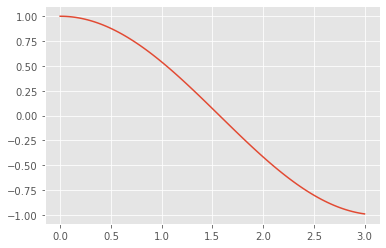

In [6]:
plt.plot(X, Y)
plt.show()

In [7]:
X1 = Phi(X, 1)
X2 = Phi(X, 3)
print(X1[:5])

[[1.         0.        ]
 [1.         0.03030303]
 [1.         0.06060606]
 [1.         0.09090909]
 [1.         0.12121212]]


In [8]:
m1 = np.linalg.solve(X1.T @ X1, X1.T @ Y)
m2 = np.linalg.solve(X2.T @ X2, X2.T @ Y)
print(m1.round(2), m2.round(2))

[ 1.23 -0.79] [ 0.99  0.09 -0.69  0.15]


Alternativ:<br><code>m1, res1 = np.linalg.lstsq(X1, Y, rcond=None)</code><br>
<code>m2, res2 = np.linalg.lstsq(X2, Y, rcond=None)</code>


In [9]:
Y1 = X1 @ m1
Y2 = X2 @ m2
err1 = ((Y - Y1)**2).sum()
err2 = ((Y - Y2)**2).sum()

Error: 0.6323166256407969


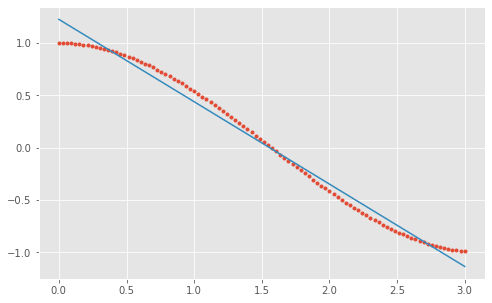

In [10]:
print("Error: {}".format(err1))
plt.figure(figsize=(8,5))
plt.plot(X, Y, ".")
plt.plot(X, Y1)
plt.show()

Error: 0.0006512133077311651


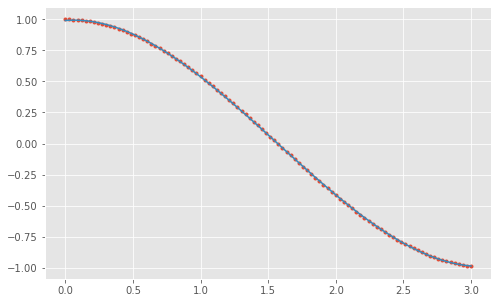

In [11]:
print("Error: {}".format(err2))
plt.figure(figsize=(8,5))
plt.plot(X, Y, ".")
plt.plot(X, Y2)
plt.show()

Schneller und einfacher (zum Rumspielen):<br><code>f = np.poly1d(np.polyfit(X, Y, deg))</code>

Und für echte Anwendung: <b>scikit-learn</b>!